<a href="https://colab.research.google.com/github/hws2002/Master-Python-with-Just-One-Book-ADP/blob/main/Chapter7/Chapter7_6_cluster_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 계층적 군집분석
USArrests 데이터의 정보로 거리를 구하고 최단, 최장, 와드 연결법을 실시해보자.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

US = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/USArrests.csv')
US

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [2]:
US.columns = ['State', 'Murder', 'Assault', 'UrbanPop', 'Rape']
US

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [3]:
labelList = US.State.tolist()
labelList

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

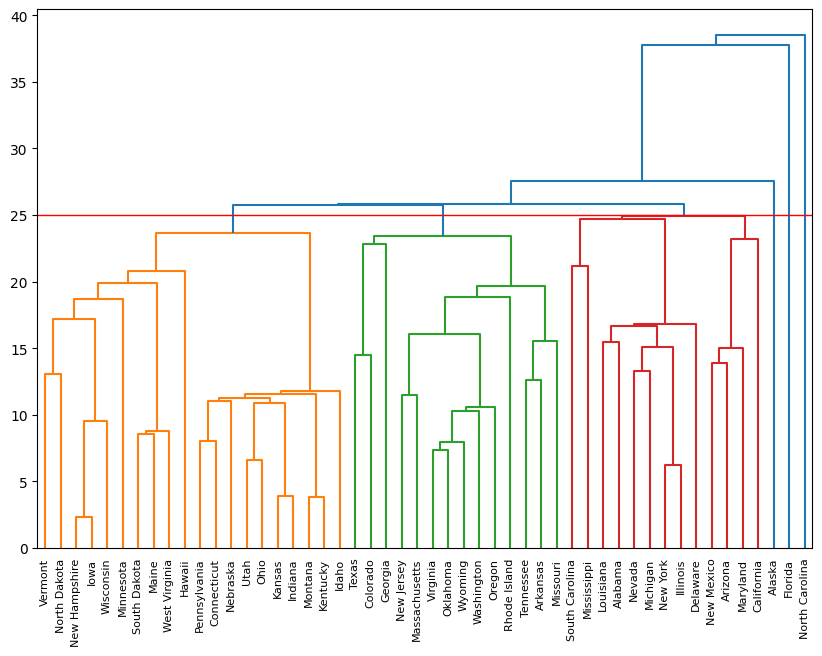

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# 최단 연결법
single = linkage(US.iloc[:,1::], metric = 'euclidean', method = 'single')

# 덴드로그램 그리기
plt.figure(figsize = (10,7))
dendrogram(single,
           orientation='top',
           labels = labelList,
           distance_sort='descending',
           color_threshold = 25, # 군집의 수를 설정하는 Height 값을 설정
           show_leaf_counts = True)
plt.axhline(25, color = 'r', linewidth = 1)
plt.show()

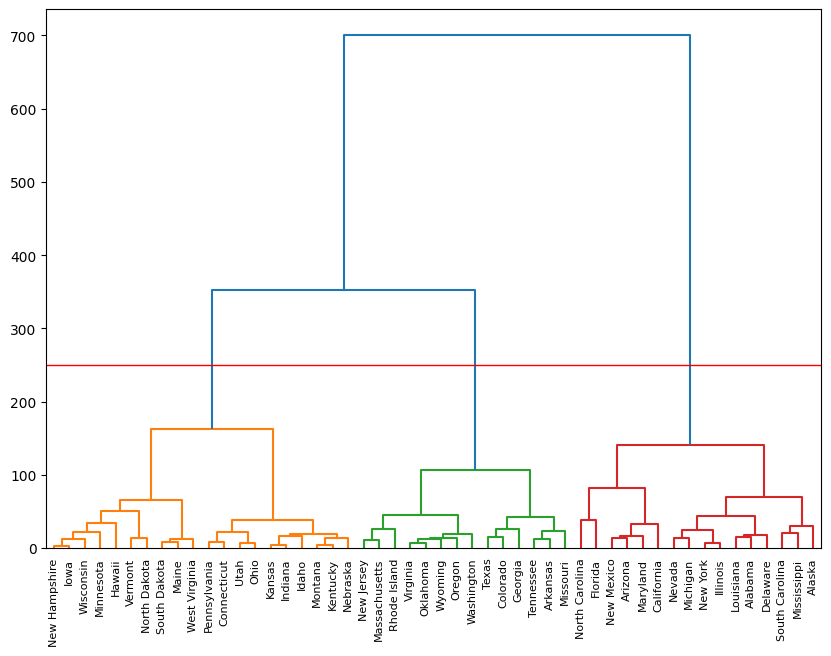

In [5]:
# 와드연결법을 사용해보자
ward = linkage(US.iloc[:,1::], metric = 'euclidean', method = 'ward')

# 덴드로그램 그리기
plt.figure(figsize = (10,7))
dendrogram(ward,
           orientation='top',
           labels = labelList,
           distance_sort='descending',
           color_threshold = 250,
           show_leaf_counts = True)
plt.axhline(250, color = 'r', linewidth = 1)
plt.show()

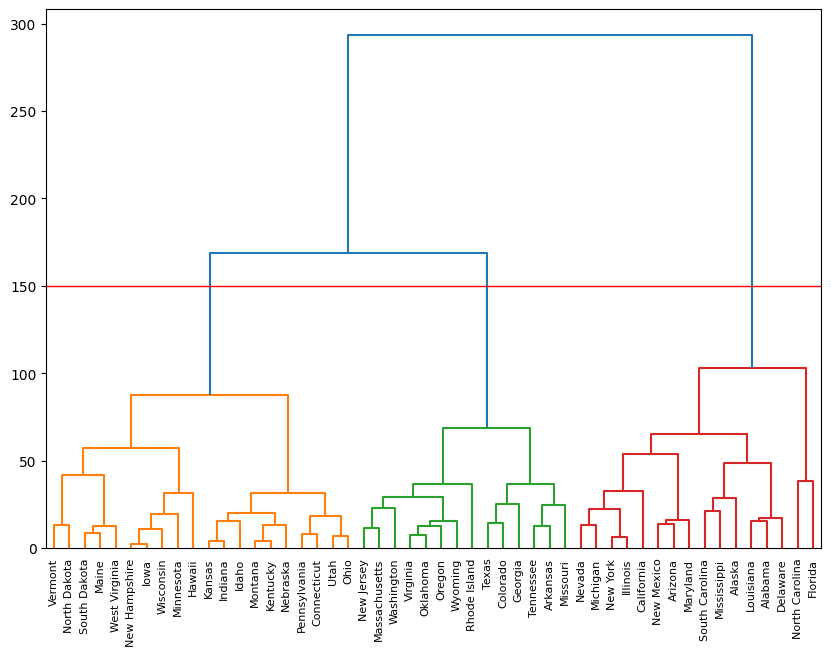

In [6]:
# 최장연결법을 사용해보자
complete = linkage(US.iloc[:,1::], metric = 'euclidean', method = 'complete')

# 덴드로그램 그리기
plt.figure(figsize = (10,7))
dendrogram(complete,
           orientation='top',
           labels = labelList,
           distance_sort='descending',
           color_threshold = 150,
           show_leaf_counts = True)
plt.axhline(150, color = 'r', linewidth = 1)
plt.show()

In [7]:
# 와드 연결법을 통해 적절한 t값을 확인하였으면 fcluster함수를 통해 t값을 적용시켜 각 객체들이 가진 군집번호를 데이터화시킬 수 있다.
# state마다 어떤 군집이 설정되었는지 확인
# 와드 연결법을 사용한 군집을 봐보자

assignments = fcluster(ward, t = 250, criterion = 'distance')
assignments

array([1, 1, 1, 2, 1, 2, 3, 1, 1, 2, 3, 3, 1, 3, 3, 3, 3, 1, 3, 1, 2, 1,
       3, 1, 2, 3, 3, 1, 3, 2, 1, 1, 1, 3, 3, 2, 2, 3, 2, 1, 3, 2, 2, 3,
       3, 2, 2, 3, 3, 2], dtype=int32)

In [8]:
US['cluster'] = assignments
US.head()

,State,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,1


In [9]:
US.drop(columns = ['State']).groupby(by = 'cluster').mean()

,Murder,Assault,UrbanPop,Rape
cluster,,,,
1,11.812500,272.562500,68.312500,28.375000
2,8.214286,173.285714,70.642857,22.842857
3,4.270000,87.550000,59.750000,14.390000


1번 집단의 경우 2,3 번 집단보다 살인, 폭행, 강간이 많으므로 상대적으로 치안이 좋지 않은 도시의 집단이라고 할 수 있다.  
반대로 3번 집단은 치안이 좋은 지역이라고 판단할 수 있다.

# 비계층적 군집분석


## K-means 알고리즘
iris 데이터에는 종속변수 target값이 있지만 target값을 활용하지 않고 군집분석을 했을 때 실제 target 값대로 나누어지는지를 확인해보자.

In [11]:
import pandas as pd
from sklearn.cluster import KMeans

iris = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/iris.csv')
X = iris.drop(columns = ['target'])
X

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


초기 K의 값을 지정해주어야 하지만 K의 적절한 값을 모르는 상황이기에 반복문을 사용하여 하라바츠 스코어와 엘보우기법을 이용하여 적절한 K의 값을 탐색한다.

In [13]:
from sklearn.metrics import calinski_harabasz_score
for k in range(2,10):
  kmeans_model = KMeans(n_clusters=k, random_state=1).fit(X)
  labels = kmeans_model.labels_
  print(calinski_harabasz_score(X,labels))

513.3038433517568
560.3660038653594
527.8352837316515
402.46819347771435
430.44943774852953
405.190965210156
366.98004553740174
329.5247040985366


콜린스키 하라바츠 스코어 결과 k값이 3일 때 가장 높은 값을 가지는 것을 확인하였다.
SSE의 증감을 보는 엘보우 기법을 사용하여 추가적으로 확인해보자.

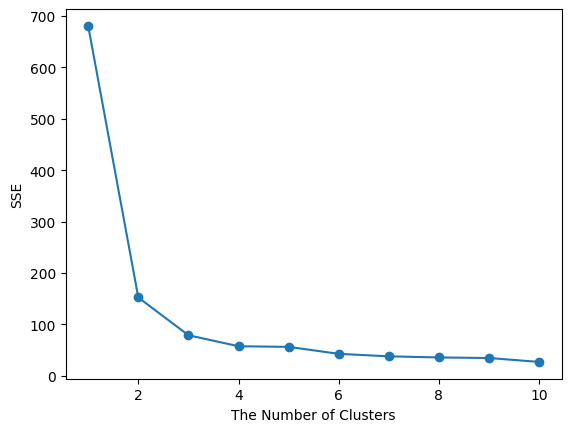

[680.8243999999996, 152.36870647733915, 78.94506582597728, 57.4732732654949, 56.25452709030101, 42.695191563275436, 37.82143557312252, 35.662872089314234, 34.56586570096572, 26.9612466993554]


In [16]:
import matplotlib.pyplot as plt
def elbow(x):
  sse = []
  for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state = 1)
    km.fit(X)
    sse.append(km.inertia_)
  plt.plot(range(1,11), sse, marker='o')
  plt.xlabel('The Number of Clusters')
  plt.ylabel('SSE')
  plt.show()
  print(sse)

elbow(X)

In [20]:
# 최적의 k 3으로 K-Means 군집화 실행
km = KMeans(n_clusters=3, random_state = 1)
km.fit(X)

# 할당된 군집을 iris 데이터에 추가
iris['cluster'] = km.labels_
iris.drop(columns = ['target']).groupby(['cluster']).mean()

,sepal length,sepal width,petal length,petal width
cluster,,,,
0,5.883607,2.740984,4.388525,1.434426
1,5.006000,3.418000,1.464000,0.244000
2,6.853846,3.076923,5.715385,2.053846


군집분석 결과 군집별로 각 특성의 차이가 있는 것이 한눈에 보인다. 이를 제대로 검정하기 위해서 ANOVA분석을 진행해보자.


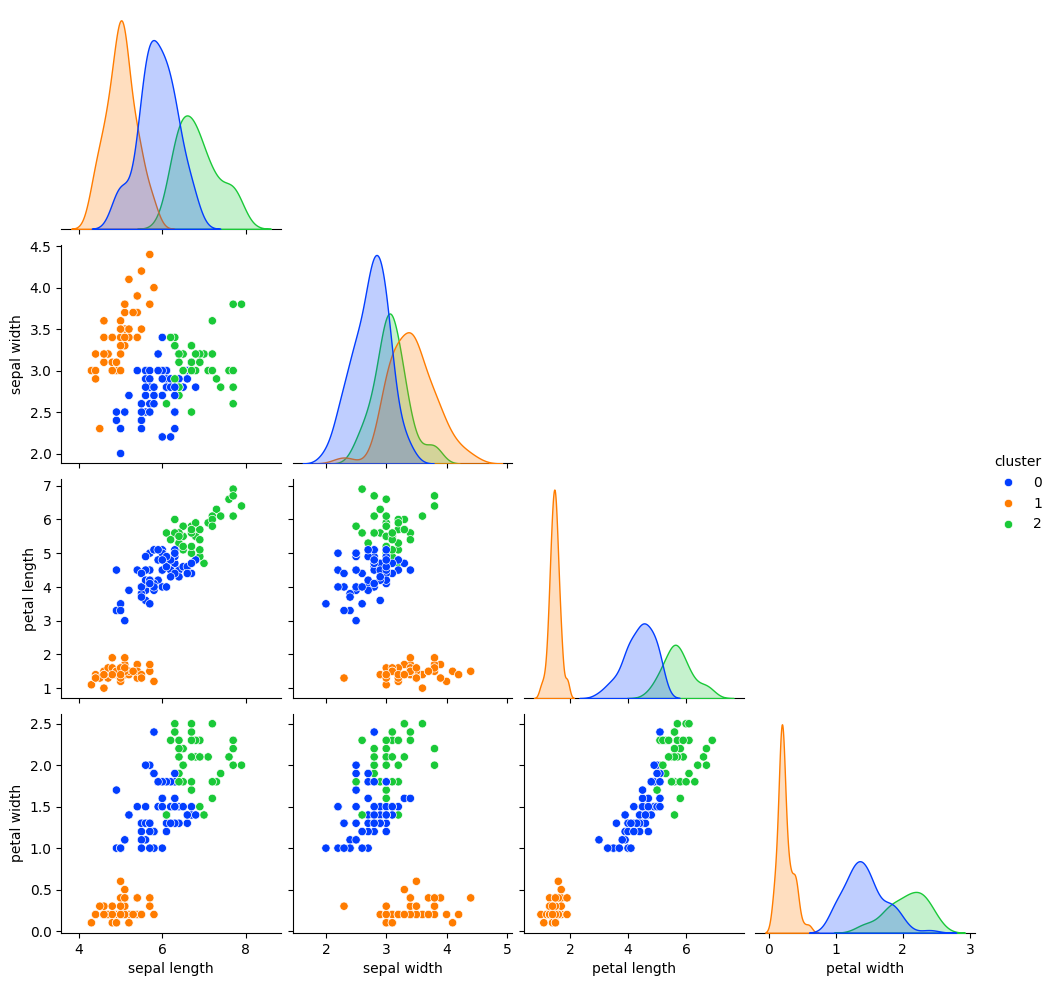

In [23]:
# 먼저 군집화된 데이터를 시각화해 분포도를 그려보자
# k-means 시각화
# 군집결과 시각화
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(iris,
             diag_kind = 'kde',
             hue = 'cluster',
             corner = True,
             palette = 'bright')
plt.show()

해당 군집분석 결과를 seaborn의 pairplot 함수를 사용하여 시각화하였다.  
변수의 특징별로 3개의 군집으로 잘 나뉘었음을 알 수 있다.  
특히 1번 군집은 0, 2번 군집보다 어떠한 변수에서도 잘 분리되는 특징을 가진다.  
기본적으로 종속변수가 없는 데이터를 군집분석을 하지만 우리는 종속변수를 알고 있는 상태에서 군집분석을 하였으므로 해당 원본의 데이터는 어떻게 분리되어 있었는지 알아보자.

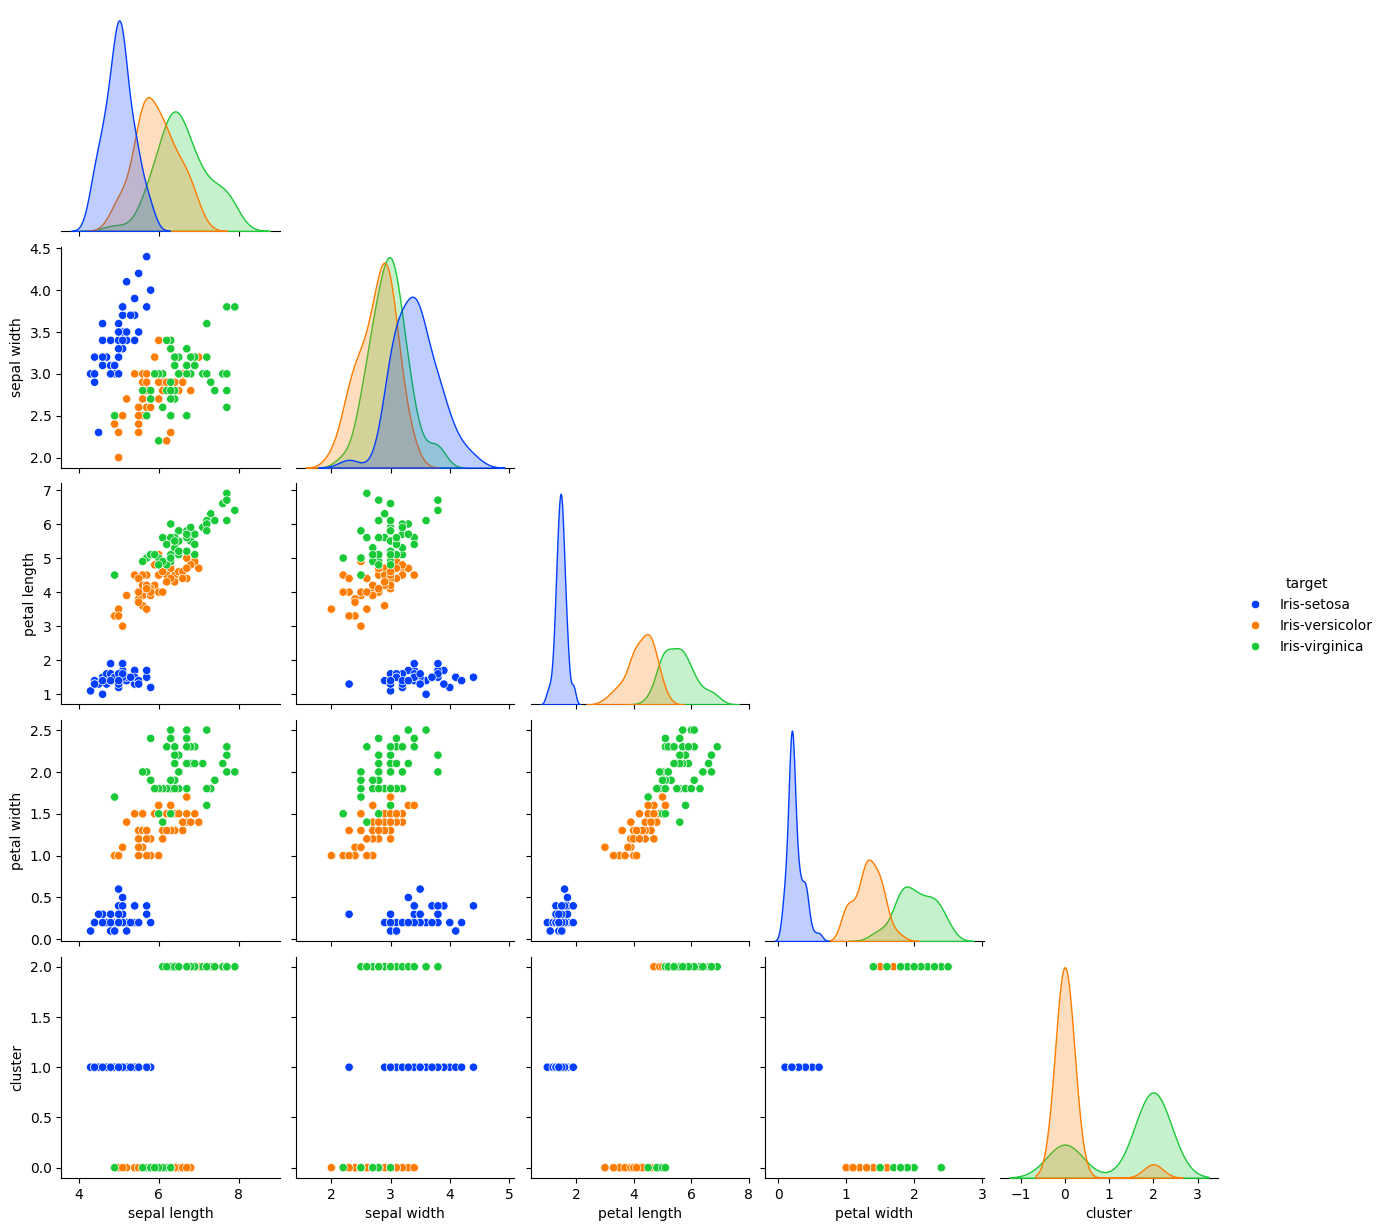

In [28]:
sns.pairplot(iris,
             diag_kind = 'kde',
             hue = 'target',
             corner = True,
             palette='bright')

plt.show()

## 혼합분포 군집분석
앞서 K-means에서 사용하였던 iris데이터를 가지고 혼합분포 군집분석을 해보자. 혼합분포 군집분석에서는 정규분포 기반 군집분석이므로 sklearn의 StandardScaler 함수를 사용해 데이터를 스케일링하여 모델에 학습시킨다.

In [29]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

iris = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/iris.csv')
df = iris.drop(columns = ['target'])
df

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [30]:
# 데이터 스케일링
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [34]:
# 가우시안 혼합모델 구축
gmm = GaussianMixture(n_components=3)
gmm.fit(df_scaled)
gmm

GaussianMixture(n_components=3)

In [35]:
gmm_labels = gmm.predict(df_scaled)
gmm_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [37]:
df['gmm_cluster'] = gmm_labels
clusters = np.unique(gmm_labels)

In [40]:
df.groupby('gmm_cluster').mean()

,sepal length,sepal width,petal length,petal width
gmm_cluster,,,,
0,5.006000,3.418000,1.464000,0.244000
1,5.904444,2.775556,4.193333,1.293333
2,6.554545,2.950909,5.489091,1.989091


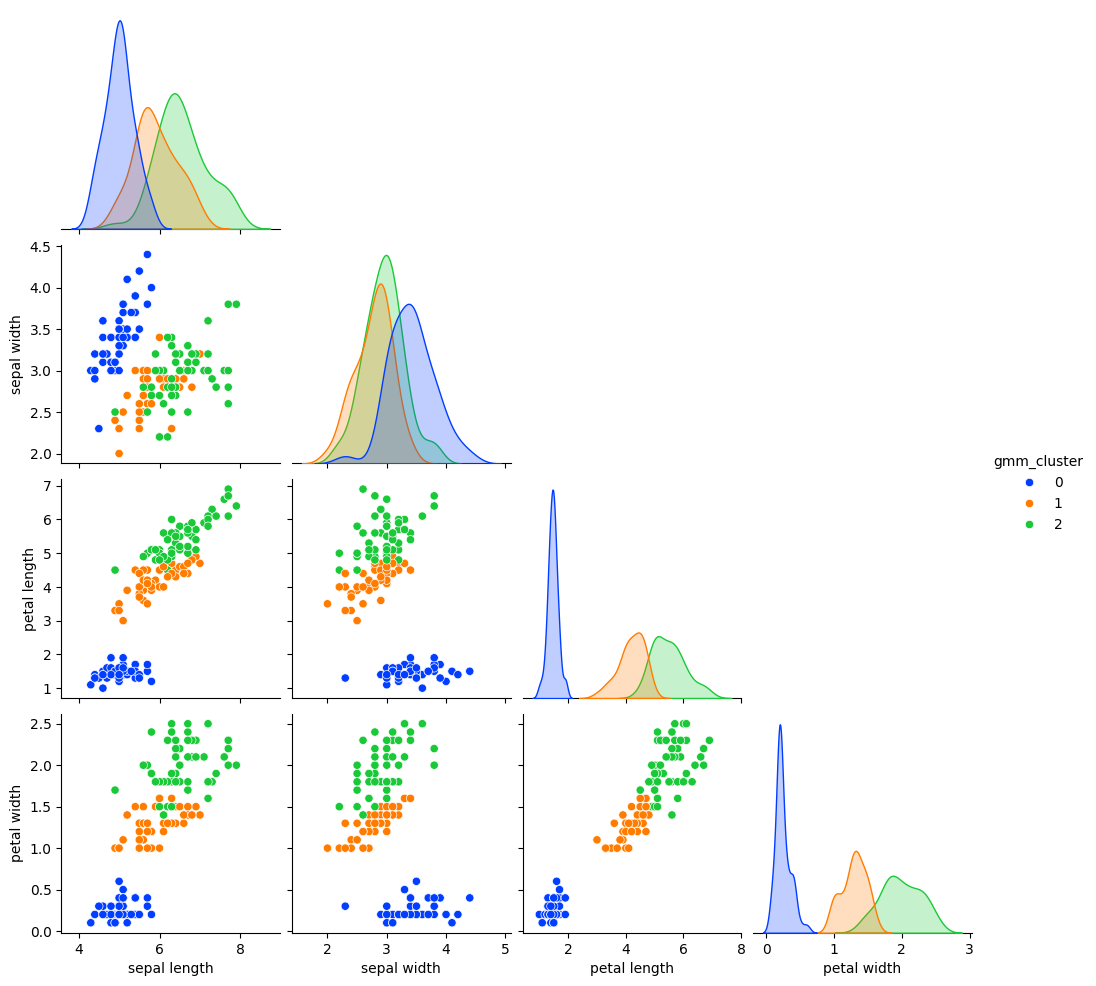

In [39]:
sns.pairplot(df,
             diag_kind = 'kde',
             hue = 'gmm_cluster',
             corner = True,
             palette = 'bright')
plt.show()

petal width와 petal length로 잘 구분된다고 볼 수 있다.